# Classifier comparison
A comparison of a several classifiers in scikit-learn on synthetic datasets. The point of this example is to illustrate the nature of decision boundaries of different classifiers<\>. This should be taken with a grain of salt, as the intuition conveyed by these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated linearly and the simplicity of classifiers such as naive Bayes and linear SVMs might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points semi-transparent. The lower right shows the classification accuracy on the test set.

<img src='https://images.unsplash.com/flagged/photo-1557804519-2a4254cae938?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8Nnx8aW5zaWdodHxlbnwwfHwwfHw%3D&auto=format&fit=crop&w=500&q=60' width=300>

In [1]:
from IPython.core.interactiveshell import InteractiveShell # 모든 명령어 출력
InteractiveShell.ast_node_interactivity = 'all'

from IPython.core.display import display, HTML # 화면 좌우 크기 100%
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings # 파이썬 버전에 따른 오류 출력 방지
warnings.filterwarnings('ignore')

https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [2]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause
# 시각화 라이브러리
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 데이터전처리, 모델 평가선택, 가상 데이터 만들기
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

# 머신러닝 알고리즘 라이브러리
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

### 반복문(for loop)으로 알고리즘을 불러와 데이터에 fitting(training, learning)하여 모델을 생성하기 위한 set up

In [3]:
h = 0.02  # step size in the mesh

names = [
    "Logistic Regression",
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    LogisticRegression(random_state=0),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

### 3가지 데이터 유형중 선형으로 분류가능한(possible to linearly classified) 가상데이터 생성

array([[-1.04948638,  0.8786438 ],
       [ 0.8780991 ,  0.89551051],
       [ 0.95928819,  1.03967316]])

<AxesSubplot:>

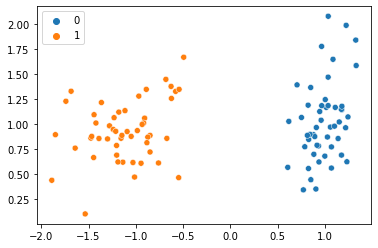

In [4]:
import seaborn as sns

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
X[:3]
sns.scatterplot(X[:, 0], X[:, 1], hue=y)

array([[-1.04948638,  0.8786438 ],
       [ 0.8780991 ,  0.89551051],
       [ 0.95928819,  1.03967316]])

array([[0.50121645, 0.50608683],
       [0.21882079, 0.00466352],
       [0.41783624, 0.56337611]])

(3, 2)

array([[-0.17749658,  0.93049627],
       [ 1.97742406,  1.76615529],
       [ 1.80002379,  1.7003428 ]])

<AxesSubplot:>

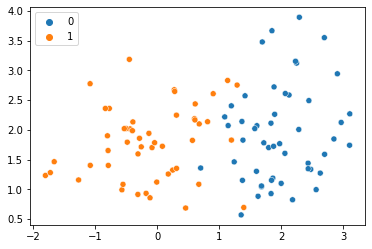

In [5]:
X[:3]
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
rng.uniform(size=X.shape)[:3]
rng.uniform(size=X.shape)[:3].shape
X[:3]
sns.scatterplot(X[:, 0], X[:, 1], hue=y)

In [6]:
linearly_separable = (X, y)

### 3가지 가상데이터(linear or non linear data type) 생성

In [7]:
datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

<AxesSubplot:>

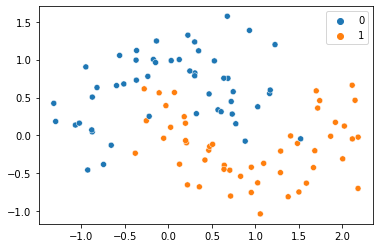

<AxesSubplot:>

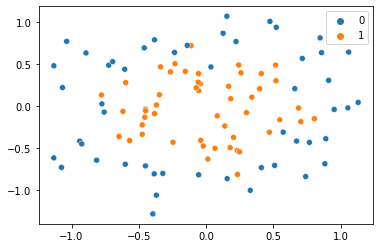

<AxesSubplot:>

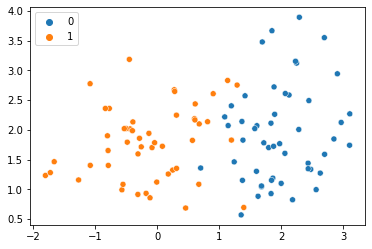

In [8]:
for ds_cnt, ds in enumerate(datasets):
    sns.scatterplot(ds[0][:, 0], ds[0][:, 1], hue=ds[1])
    plt.show()

### Understanding 데이터 시각화 np.meshgrid

(array([[1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.]]),
 array([[ 5.  ,  5.  ,  5.  ,  5.  ,  5.  ],
        [ 6.25,  6.25,  6.25,  6.25,  6.25],
        [ 7.5 ,  7.5 ,  7.5 ,  7.5 ,  7.5 ],
        [ 8.75,  8.75,  8.75,  8.75,  8.75],
        [10.  , 10.  , 10.  , 10.  , 10.  ]]))

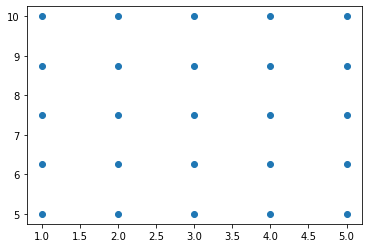

In [9]:
garo = np.linspace(1,5,5)
sero = np.linspace(5,10,5)
garo, sero = np.meshgrid(garo, sero)
garo, sero
plt.scatter(garo, sero)

(-2.301737447070235, 3.6087431161656847)

(0.06802498168359294, 4.392677587182645)

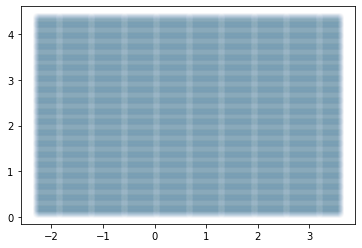

In [10]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
x_min, x_max
y_min, y_max
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.scatter(xx, yy, alpha=0.01)

array([[-2.30173745, -2.28173745, -2.26173745, ...,  3.55826255,
         3.57826255,  3.59826255],
       [-2.30173745, -2.28173745, -2.26173745, ...,  3.55826255,
         3.57826255,  3.59826255],
       [-2.30173745, -2.28173745, -2.26173745, ...,  3.55826255,
         3.57826255,  3.59826255],
       ...,
       [-2.30173745, -2.28173745, -2.26173745, ...,  3.55826255,
         3.57826255,  3.59826255],
       [-2.30173745, -2.28173745, -2.26173745, ...,  3.55826255,
         3.57826255,  3.59826255],
       [-2.30173745, -2.28173745, -2.26173745, ...,  3.55826255,
         3.57826255,  3.59826255]])

array([[0.06802498, 0.06802498, 0.06802498, ..., 0.06802498, 0.06802498,
        0.06802498],
       [0.08802498, 0.08802498, 0.08802498, ..., 0.08802498, 0.08802498,
        0.08802498],
       [0.10802498, 0.10802498, 0.10802498, ..., 0.10802498, 0.10802498,
        0.10802498],
       ...,
       [4.34802498, 4.34802498, 4.34802498, ..., 4.34802498, 4.34802498,
        4.34802498],
       [4.36802498, 4.36802498, 4.36802498, ..., 4.36802498, 4.36802498,
        4.36802498],
       [4.38802498, 4.38802498, 4.38802498, ..., 4.38802498, 4.38802498,
        4.38802498]])

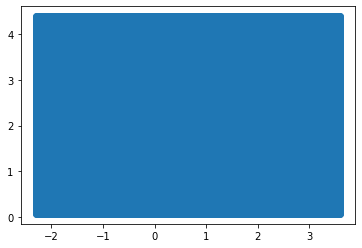

In [11]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
xx
yy
plt.scatter(xx, yy)

### 훈련데이터(solid color)와 시험데이터(semi-transparent) Visulaization

Text(0.5, 1.0, 'Input data')

(-2.551619354168561, 2.388380645831444)

(-2.6433716734777684, 2.776628326522237)

[]

[]

(-2.449864046356524, 2.47013595364348)

(-2.851825605728012, 2.5081743942719927)

[]

[]

(-2.6999721849660956, 2.2400278150339092)

(-2.313706956958681, 3.366293043041324)

[]

[]

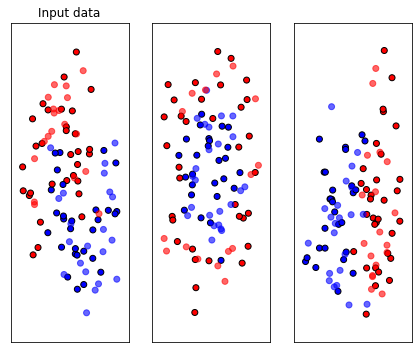

In [12]:
figure = plt.figure(figsize=(30, 20))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
        
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)#, edgecolors="k" )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

### 여러장의 그림 그리는 방법 이해하기 plt.subplot(가로, 세로, 순번)

In [13]:
print(f'가로화면 개수 {len(datasets)}')
print(f'세로화면 개수 {len(classifiers) + 1}')

가로화면 개수 3
세로화면 개수 12


(3, 12, 2)

(3, 12, 3)

(3, 12, 4)

(3, 12, 5)

(3, 12, 6)

(3, 12, 7)

(3, 12, 8)

(3, 12, 9)

(3, 12, 10)

(3, 12, 11)

(3, 12, 12)

(3, 12, 14)

(3, 12, 15)

(3, 12, 16)

(3, 12, 17)

(3, 12, 18)

(3, 12, 19)

(3, 12, 20)

(3, 12, 21)

(3, 12, 22)

(3, 12, 23)

(3, 12, 24)

(3, 12, 26)

(3, 12, 27)

(3, 12, 28)

(3, 12, 29)

(3, 12, 30)

(3, 12, 31)

(3, 12, 32)

(3, 12, 33)

(3, 12, 34)

(3, 12, 35)

(3, 12, 36)

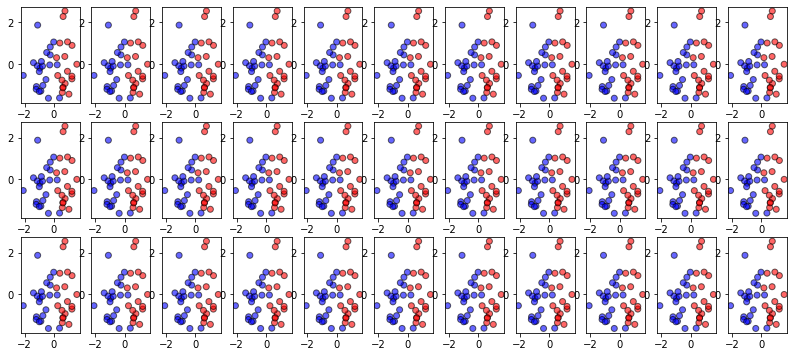

In [14]:
figure = plt.figure(figsize=(15, 6))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # iterate over classifiers
    i += 1
    for name, clf in zip(names, classifiers):
        (len(datasets), len(classifiers) + 1, i)
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )
        i += 1

### 훈련데이터로 기계학습하여 시험데이터를 Classification (Prediction) 시각화

LogisticRegression(random_state=0)

(-2.551619354168561, 2.388380645831444)

(-2.6433716734777684, 2.776628326522237)

[]

[]

Text(0.5, 1.0, 'Logistic Regression')

Text(2.0883806458314442, -2.3433716734777685, '.88')

KNeighborsClassifier(n_neighbors=3)

(-2.551619354168561, 2.388380645831444)

(-2.6433716734777684, 2.776628326522237)

[]

[]

Text(0.5, 1.0, 'Nearest Neighbors')

Text(2.0883806458314442, -2.3433716734777685, '.97')

SVC(C=0.025, kernel='linear')

(-2.551619354168561, 2.388380645831444)

(-2.6433716734777684, 2.776628326522237)

[]

[]

Text(0.5, 1.0, 'Linear SVM')

Text(2.0883806458314442, -2.3433716734777685, '.88')

SVC(C=1, gamma=2)

(-2.551619354168561, 2.388380645831444)

(-2.6433716734777684, 2.776628326522237)

[]

[]

Text(0.5, 1.0, 'RBF SVM')

Text(2.0883806458314442, -2.3433716734777685, '.97')

GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1))

(-2.551619354168561, 2.388380645831444)

(-2.6433716734777684, 2.776628326522237)

[]

[]

Text(0.5, 1.0, 'Gaussian Process')

Text(2.0883806458314442, -2.3433716734777685, '.97')

DecisionTreeClassifier(max_depth=5)

(-2.551619354168561, 2.388380645831444)

(-2.6433716734777684, 2.776628326522237)

[]

[]

Text(0.5, 1.0, 'Decision Tree')

Text(2.0883806458314442, -2.3433716734777685, '.95')

RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)

(-2.551619354168561, 2.388380645831444)

(-2.6433716734777684, 2.776628326522237)

[]

[]

Text(0.5, 1.0, 'Random Forest')

Text(2.0883806458314442, -2.3433716734777685, '.93')

MLPClassifier(alpha=1, max_iter=1000)

(-2.551619354168561, 2.388380645831444)

(-2.6433716734777684, 2.776628326522237)

[]

[]

Text(0.5, 1.0, 'Neural Net')

Text(2.0883806458314442, -2.3433716734777685, '.90')

AdaBoostClassifier()

(-2.551619354168561, 2.388380645831444)

(-2.6433716734777684, 2.776628326522237)

[]

[]

Text(0.5, 1.0, 'AdaBoost')

Text(2.0883806458314442, -2.3433716734777685, '.93')

GaussianNB()

(-2.551619354168561, 2.388380645831444)

(-2.6433716734777684, 2.776628326522237)

[]

[]

Text(0.5, 1.0, 'Naive Bayes')

Text(2.0883806458314442, -2.3433716734777685, '.88')

QuadraticDiscriminantAnalysis()

(-2.551619354168561, 2.388380645831444)

(-2.6433716734777684, 2.776628326522237)

[]

[]

Text(0.5, 1.0, 'QDA')

Text(2.0883806458314442, -2.3433716734777685, '.85')

LogisticRegression(random_state=0)

(-2.449864046356524, 2.47013595364348)

(-2.851825605728012, 2.5081743942719927)

[]

[]

Text(2.1701359536434803, -2.551825605728012, '.40')

KNeighborsClassifier(n_neighbors=3)

(-2.449864046356524, 2.47013595364348)

(-2.851825605728012, 2.5081743942719927)

[]

[]

Text(2.1701359536434803, -2.551825605728012, '.93')

SVC(C=0.025, kernel='linear')

(-2.449864046356524, 2.47013595364348)

(-2.851825605728012, 2.5081743942719927)

[]

[]

Text(2.1701359536434803, -2.551825605728012, '.40')

SVC(C=1, gamma=2)

(-2.449864046356524, 2.47013595364348)

(-2.851825605728012, 2.5081743942719927)

[]

[]

Text(2.1701359536434803, -2.551825605728012, '.88')

GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1))

(-2.449864046356524, 2.47013595364348)

(-2.851825605728012, 2.5081743942719927)

[]

[]

Text(2.1701359536434803, -2.551825605728012, '.90')

DecisionTreeClassifier(max_depth=5)

(-2.449864046356524, 2.47013595364348)

(-2.851825605728012, 2.5081743942719927)

[]

[]

Text(2.1701359536434803, -2.551825605728012, '.80')

RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)

(-2.449864046356524, 2.47013595364348)

(-2.851825605728012, 2.5081743942719927)

[]

[]

Text(2.1701359536434803, -2.551825605728012, '.80')

MLPClassifier(alpha=1, max_iter=1000)

(-2.449864046356524, 2.47013595364348)

(-2.851825605728012, 2.5081743942719927)

[]

[]

Text(2.1701359536434803, -2.551825605728012, '.90')

AdaBoostClassifier()

(-2.449864046356524, 2.47013595364348)

(-2.851825605728012, 2.5081743942719927)

[]

[]

Text(2.1701359536434803, -2.551825605728012, '.82')

GaussianNB()

(-2.449864046356524, 2.47013595364348)

(-2.851825605728012, 2.5081743942719927)

[]

[]

Text(2.1701359536434803, -2.551825605728012, '.70')

QuadraticDiscriminantAnalysis()

(-2.449864046356524, 2.47013595364348)

(-2.851825605728012, 2.5081743942719927)

[]

[]

Text(2.1701359536434803, -2.551825605728012, '.72')

LogisticRegression(random_state=0)

(-2.6999721849660956, 2.2400278150339092)

(-2.313706956958681, 3.366293043041324)

[]

[]

Text(1.9400278150339092, -2.013706956958681, '.95')

KNeighborsClassifier(n_neighbors=3)

(-2.6999721849660956, 2.2400278150339092)

(-2.313706956958681, 3.366293043041324)

[]

[]

Text(1.9400278150339092, -2.013706956958681, '.93')

SVC(C=0.025, kernel='linear')

(-2.6999721849660956, 2.2400278150339092)

(-2.313706956958681, 3.366293043041324)

[]

[]

Text(1.9400278150339092, -2.013706956958681, '.93')

SVC(C=1, gamma=2)

(-2.6999721849660956, 2.2400278150339092)

(-2.313706956958681, 3.366293043041324)

[]

[]

Text(1.9400278150339092, -2.013706956958681, '.95')

GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1))

(-2.6999721849660956, 2.2400278150339092)

(-2.313706956958681, 3.366293043041324)

[]

[]

Text(1.9400278150339092, -2.013706956958681, '.93')

DecisionTreeClassifier(max_depth=5)

(-2.6999721849660956, 2.2400278150339092)

(-2.313706956958681, 3.366293043041324)

[]

[]

Text(1.9400278150339092, -2.013706956958681, '.95')

RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)

(-2.6999721849660956, 2.2400278150339092)

(-2.313706956958681, 3.366293043041324)

[]

[]

Text(1.9400278150339092, -2.013706956958681, '.90')

MLPClassifier(alpha=1, max_iter=1000)

(-2.6999721849660956, 2.2400278150339092)

(-2.313706956958681, 3.366293043041324)

[]

[]

Text(1.9400278150339092, -2.013706956958681, '.95')

AdaBoostClassifier()

(-2.6999721849660956, 2.2400278150339092)

(-2.313706956958681, 3.366293043041324)

[]

[]

Text(1.9400278150339092, -2.013706956958681, '.95')

GaussianNB()

(-2.6999721849660956, 2.2400278150339092)

(-2.313706956958681, 3.366293043041324)

[]

[]

Text(1.9400278150339092, -2.013706956958681, '.95')

QuadraticDiscriminantAnalysis()

(-2.6999721849660956, 2.2400278150339092)

(-2.313706956958681, 3.366293043041324)

[]

[]

Text(1.9400278150339092, -2.013706956958681, '.93')

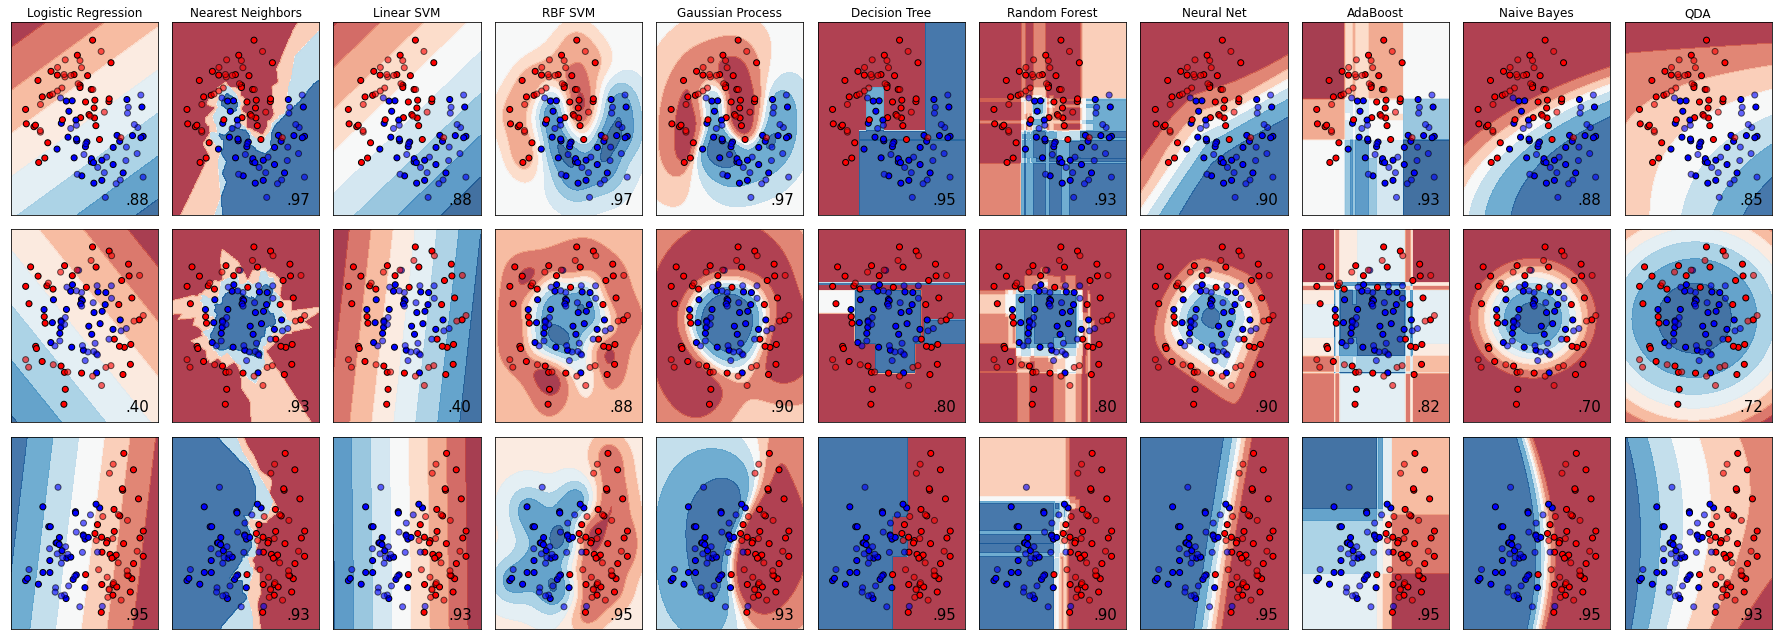

In [15]:
figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

### Full script

Text(0.5, 1.0, 'Input data')

(-2.551619354168561, 2.388380645831444)

(-2.6433716734777684, 2.776628326522237)

[]

[]

KNeighborsClassifier(n_neighbors=3)

(-2.551619354168561, 2.388380645831444)

(-2.6433716734777684, 2.776628326522237)

[]

[]

Text(0.5, 1.0, 'Nearest Neighbors')

Text(2.0883806458314442, -2.3433716734777685, '.97')

SVC(C=0.025, kernel='linear')

(-2.551619354168561, 2.388380645831444)

(-2.6433716734777684, 2.776628326522237)

[]

[]

Text(0.5, 1.0, 'Linear SVM')

Text(2.0883806458314442, -2.3433716734777685, '.88')

SVC(C=1, gamma=2)

(-2.551619354168561, 2.388380645831444)

(-2.6433716734777684, 2.776628326522237)

[]

[]

Text(0.5, 1.0, 'RBF SVM')

Text(2.0883806458314442, -2.3433716734777685, '.97')

GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1))

(-2.551619354168561, 2.388380645831444)

(-2.6433716734777684, 2.776628326522237)

[]

[]

Text(0.5, 1.0, 'Gaussian Process')

Text(2.0883806458314442, -2.3433716734777685, '.97')

DecisionTreeClassifier(max_depth=5)

(-2.551619354168561, 2.388380645831444)

(-2.6433716734777684, 2.776628326522237)

[]

[]

Text(0.5, 1.0, 'Decision Tree')

Text(2.0883806458314442, -2.3433716734777685, '.95')

RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)

(-2.551619354168561, 2.388380645831444)

(-2.6433716734777684, 2.776628326522237)

[]

[]

Text(0.5, 1.0, 'Random Forest')

Text(2.0883806458314442, -2.3433716734777685, '.95')

MLPClassifier(alpha=1, max_iter=1000)

(-2.551619354168561, 2.388380645831444)

(-2.6433716734777684, 2.776628326522237)

[]

[]

Text(0.5, 1.0, 'Neural Net')

Text(2.0883806458314442, -2.3433716734777685, '.95')

AdaBoostClassifier()

(-2.551619354168561, 2.388380645831444)

(-2.6433716734777684, 2.776628326522237)

[]

[]

Text(0.5, 1.0, 'AdaBoost')

Text(2.0883806458314442, -2.3433716734777685, '.93')

GaussianNB()

(-2.551619354168561, 2.388380645831444)

(-2.6433716734777684, 2.776628326522237)

[]

[]

Text(0.5, 1.0, 'Naive Bayes')

Text(2.0883806458314442, -2.3433716734777685, '.88')

QuadraticDiscriminantAnalysis()

(-2.551619354168561, 2.388380645831444)

(-2.6433716734777684, 2.776628326522237)

[]

[]

Text(0.5, 1.0, 'QDA')

Text(2.0883806458314442, -2.3433716734777685, '.85')

(-2.449864046356524, 2.47013595364348)

(-2.851825605728012, 2.5081743942719927)

[]

[]

KNeighborsClassifier(n_neighbors=3)

(-2.449864046356524, 2.47013595364348)

(-2.851825605728012, 2.5081743942719927)

[]

[]

Text(2.1701359536434803, -2.551825605728012, '.93')

SVC(C=0.025, kernel='linear')

(-2.449864046356524, 2.47013595364348)

(-2.851825605728012, 2.5081743942719927)

[]

[]

Text(2.1701359536434803, -2.551825605728012, '.40')

SVC(C=1, gamma=2)

(-2.449864046356524, 2.47013595364348)

(-2.851825605728012, 2.5081743942719927)

[]

[]

Text(2.1701359536434803, -2.551825605728012, '.88')

GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1))

(-2.449864046356524, 2.47013595364348)

(-2.851825605728012, 2.5081743942719927)

[]

[]

Text(2.1701359536434803, -2.551825605728012, '.90')

DecisionTreeClassifier(max_depth=5)

(-2.449864046356524, 2.47013595364348)

(-2.851825605728012, 2.5081743942719927)

[]

[]

Text(2.1701359536434803, -2.551825605728012, '.78')

RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)

(-2.449864046356524, 2.47013595364348)

(-2.851825605728012, 2.5081743942719927)

[]

[]

Text(2.1701359536434803, -2.551825605728012, '.80')

MLPClassifier(alpha=1, max_iter=1000)

(-2.449864046356524, 2.47013595364348)

(-2.851825605728012, 2.5081743942719927)

[]

[]

Text(2.1701359536434803, -2.551825605728012, '.90')

AdaBoostClassifier()

(-2.449864046356524, 2.47013595364348)

(-2.851825605728012, 2.5081743942719927)

[]

[]

Text(2.1701359536434803, -2.551825605728012, '.82')

GaussianNB()

(-2.449864046356524, 2.47013595364348)

(-2.851825605728012, 2.5081743942719927)

[]

[]

Text(2.1701359536434803, -2.551825605728012, '.70')

QuadraticDiscriminantAnalysis()

(-2.449864046356524, 2.47013595364348)

(-2.851825605728012, 2.5081743942719927)

[]

[]

Text(2.1701359536434803, -2.551825605728012, '.72')

(-2.6999721849660956, 2.2400278150339092)

(-2.313706956958681, 3.366293043041324)

[]

[]

KNeighborsClassifier(n_neighbors=3)

(-2.6999721849660956, 2.2400278150339092)

(-2.313706956958681, 3.366293043041324)

[]

[]

Text(1.9400278150339092, -2.013706956958681, '.93')

SVC(C=0.025, kernel='linear')

(-2.6999721849660956, 2.2400278150339092)

(-2.313706956958681, 3.366293043041324)

[]

[]

Text(1.9400278150339092, -2.013706956958681, '.93')

SVC(C=1, gamma=2)

(-2.6999721849660956, 2.2400278150339092)

(-2.313706956958681, 3.366293043041324)

[]

[]

Text(1.9400278150339092, -2.013706956958681, '.95')

GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1))

(-2.6999721849660956, 2.2400278150339092)

(-2.313706956958681, 3.366293043041324)

[]

[]

Text(1.9400278150339092, -2.013706956958681, '.93')

DecisionTreeClassifier(max_depth=5)

(-2.6999721849660956, 2.2400278150339092)

(-2.313706956958681, 3.366293043041324)

[]

[]

Text(1.9400278150339092, -2.013706956958681, '.95')

RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)

(-2.6999721849660956, 2.2400278150339092)

(-2.313706956958681, 3.366293043041324)

[]

[]

Text(1.9400278150339092, -2.013706956958681, '.93')

MLPClassifier(alpha=1, max_iter=1000)

(-2.6999721849660956, 2.2400278150339092)

(-2.313706956958681, 3.366293043041324)

[]

[]

Text(1.9400278150339092, -2.013706956958681, '.95')

AdaBoostClassifier()

(-2.6999721849660956, 2.2400278150339092)

(-2.313706956958681, 3.366293043041324)

[]

[]

Text(1.9400278150339092, -2.013706956958681, '.95')

GaussianNB()

(-2.6999721849660956, 2.2400278150339092)

(-2.313706956958681, 3.366293043041324)

[]

[]

Text(1.9400278150339092, -2.013706956958681, '.95')

QuadraticDiscriminantAnalysis()

(-2.6999721849660956, 2.2400278150339092)

(-2.313706956958681, 3.366293043041324)

[]

[]

Text(1.9400278150339092, -2.013706956958681, '.93')

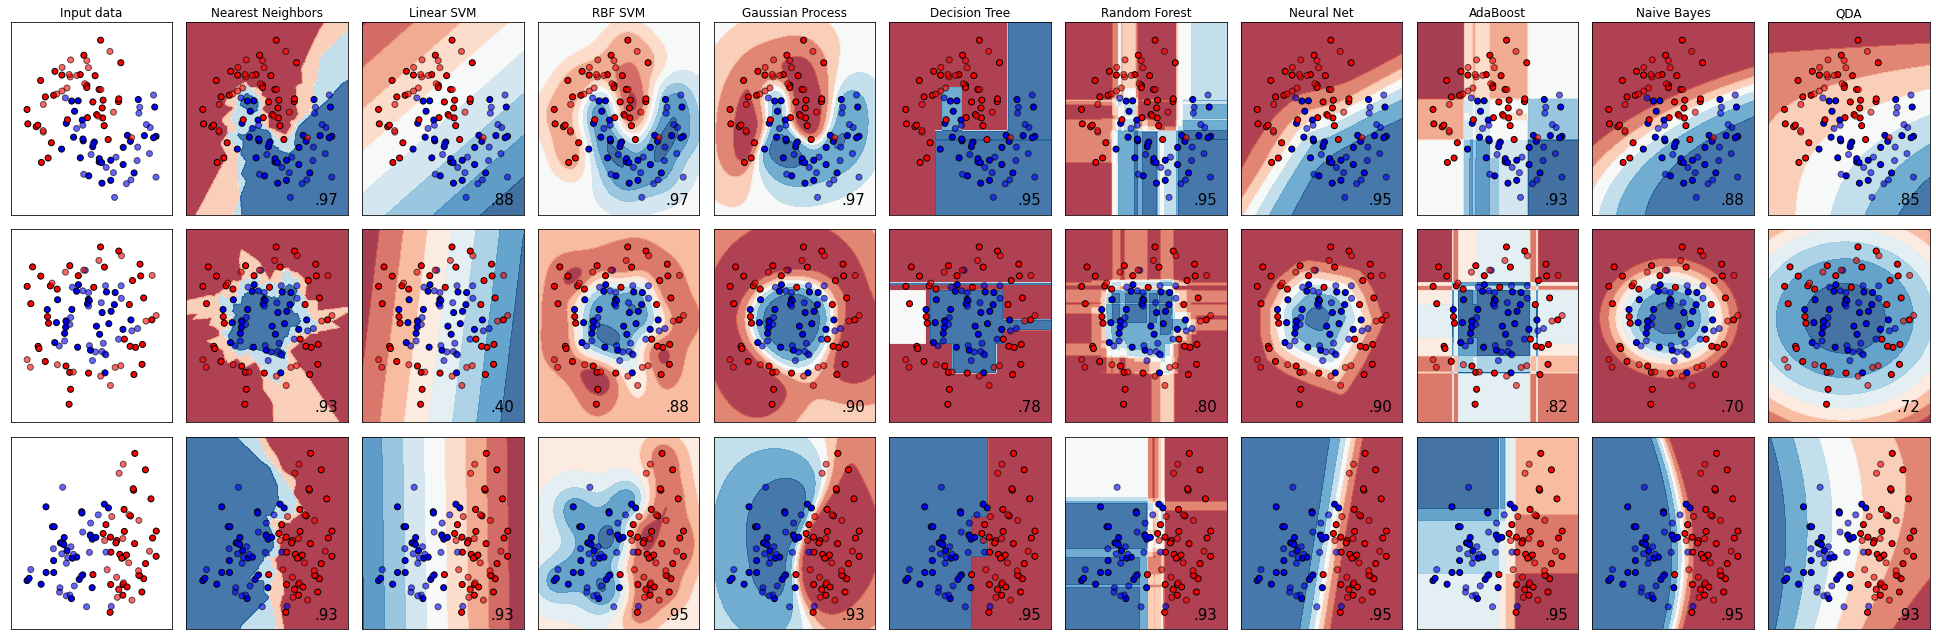

In [16]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = 0.02  # step size in the mesh

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

In [17]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# End